# GRIP: The Sparks Foundation Internship

# Author: Akash Kokne

# Data Science & Business Analytics Intern

# Task 1: Prediction using Supervised Machine Learning (Level - Beginner)

In this task, I examined the relationship between the study of hours and score of students in exam. The aim is to build a simple linear regression model that can accurately predict the score of students based on study hours.

In [1]:
#importing all libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

In [2]:
#read dataset from given link
# url="http://bit.ly/w-data"
# df=pd.read_csv(url)
df=pd.read_csv("data.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Exploratory Data Analysis

In [4]:
df.shape

(25, 2)

In [5]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.nunique()

Hours     23
Scores    23
dtype: int64

In [9]:
#checking null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values in the dataset, hence it is clean.

# Data Visualization

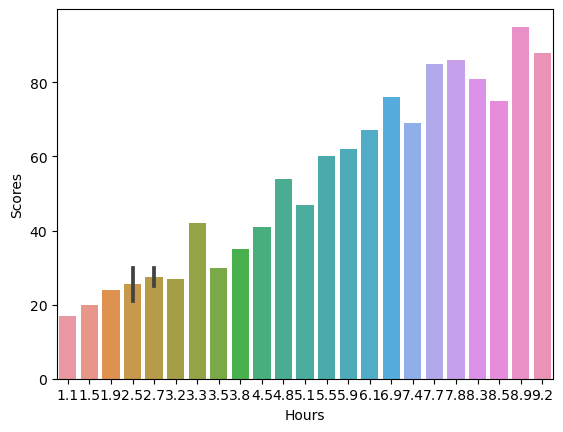

In [10]:
sns.barplot(x='Hours',y='Scores',data=df)
plt.show()

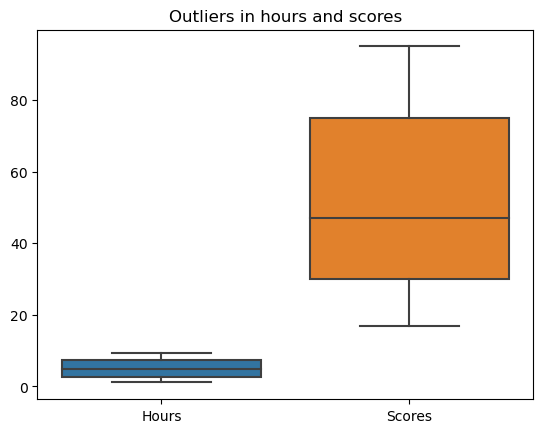

In [11]:
# Outlier Analysis
sns.boxplot(data=df)
plt.title("Outliers in hours and scores")
plt.show()

There are no considerable outliers present in the data.

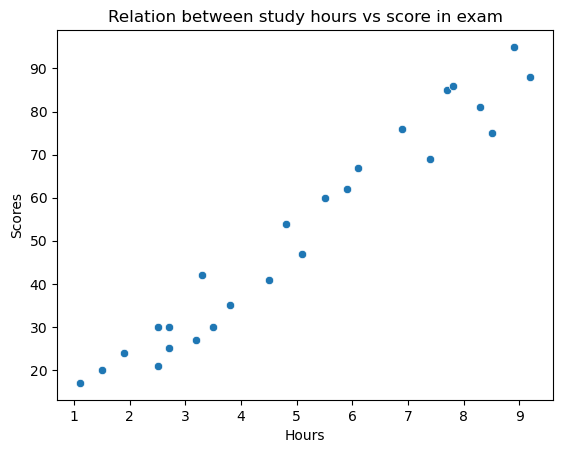

In [12]:
#check correlation 
sns.scatterplot(x='Hours',y='Scores',data=df)
plt.title("Relation between study hours vs score in exam")
plt.show()

Above see how Scores are related with Hours variables using scatter plot, it shows that positive correlation between study hours and score of students in exam.

In [13]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


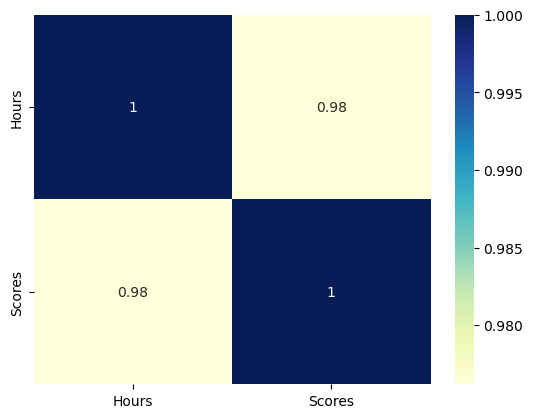

In [14]:
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show()

from scatter plot & heatmap, we can observe that 'Scores' & 'Hours' have a higher correlation and it shows a linear pattern in the scatter plot as well as giving 1 correlation.

# Preparing the dataset

Now divide data into inputs & outputs

In [15]:
#extracting independent and dependent variales
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

then split this data into training and testing sets. We'll do this using train_test_split method

In [16]:
#split the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2, random_state=0)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


# Simple Linear Regression

In [18]:
#Fit the simple regression model to training
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

# Getting regression equation

regressor coefficient: [9.91065648]
regressor intercept: 2.018160041434683


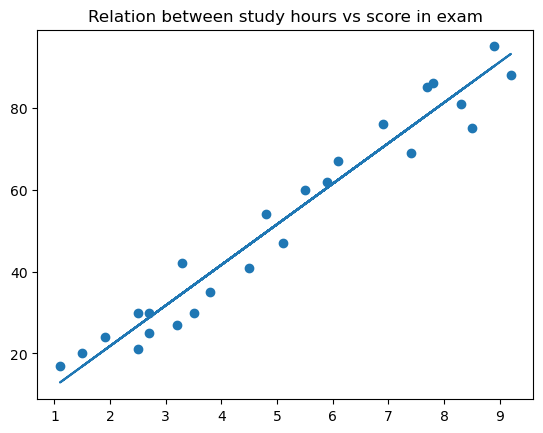

In [19]:
line=regressor.coef_*X+regressor.intercept_
print("regressor coefficient:",regressor.coef_)
print("regressor intercept:",regressor.intercept_)
plt.scatter(x='Hours',y='Scores',data=df)
plt.plot(X,line)
plt.title("Relation between study hours vs score in exam")
plt.show()

Regression Equation : line=regressor.intercept_+regressor.coef_*X 

Y = 2.0181 + 9.9106 * X

# Making Prediction

In [20]:
#prediction of train and test dataset result
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Visualizing the train dataset results

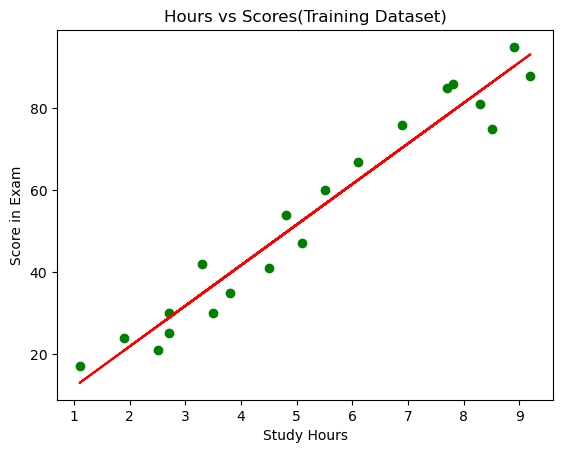

In [21]:
plt.scatter(X_train,y_train,color='green')
plt.plot(X_train,y_train_pred,color='red')
plt.title("Hours vs Scores(Training Dataset)")
plt.xlabel("Study Hours")
plt.ylabel("Score in Exam")
plt.show()

In the above plot, there are observations given by the green color and predictions are covered by red regression line. The regression line shows a correlation between dependent and independent variable. As we can see in above plot, most of the observations are close to the regressioin line, hence our model is good for training dataset.

# Visualizing the test dataset results

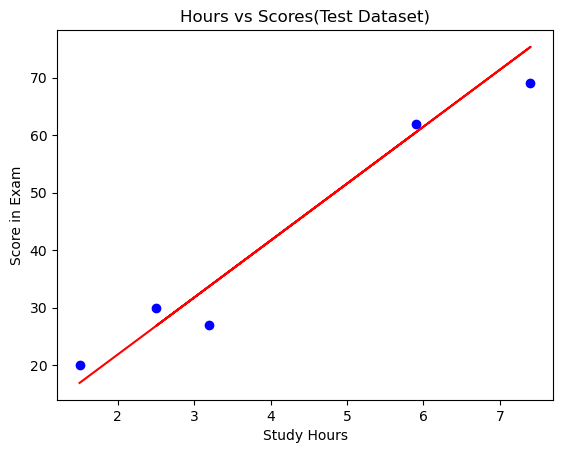

In [22]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,y_test_pred,color='red')
plt.title("Hours vs Scores(Test Dataset)")
plt.xlabel("Study Hours")
plt.ylabel("Score in Exam")
plt.show()

In the above plot, there are observations given by the blue color, and prediction is given by the red regression line. As we can see, most of the observations are close to the regression line, hance we can say our simple linear regressioin is good model and able to make good predictions.

# Model Evalution

In [23]:
#Accuracy on train dataset
rsquare=r2_score(y_train,y_train_pred)
print("Accuracy on train dataset:",rsquare)
#Accuracy on test dataset
rsquare=r2_score(y_test,y_test_pred)
print("Accuracy on test dataset:",rsquare)

Accuracy on train dataset: 0.9515510725211552
Accuracy on test dataset: 0.9454906892105356


In [24]:
print('MAE:',metrics.mean_absolute_error(y_test,y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
print('Rsquare:',metrics.r2_score(y_test,y_test_pred))

MAE: 4.183859899002975
MSE: 21.5987693072174
RMSE: 4.6474476121003665
Rsquare: 0.9454906892105356


By comparing these values from y_pred and y_test, we can check how good our model is performing.

# Problem Statement: What will be predicted score if a student studies for 9.25 hrs/day?

In [25]:
hours=[[9.25]]
predicted_score=regressor.predict(hours)
print("Predicted Score for 9.25 hours/day of study: {:.2f}%".format(predicted_score[0]))

Predicted Score for 9.25 hours/day of study: 93.69%
